# Project: TMDB Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

Data set description. 
The TMDb movie dataset is a dataset that contains a list of movies that were rated by TMDb. This  movies  were rated by votes and popularity.
The dataset contained the following:
- id contains int which was used to provide a unique number for each movie                       
- imdb_id contains the unique code given to each movie by the rating  website                
- popularity contains the popularity of each movie              
- budget  contains the amount of money that was invested into the making or production of the movie                 
- revenue contains the amount of money that was generated from the movie                  
- original_title contains the title of the movie          
- cast  contains the actors and actresses that were in the movie                   
- homepage  contains the link to the website about the movie               
- director   contains the name of the director that directed the movie              
- tagline    contains certain words that are in the movie              
- keywords    contains words about the movie        
- overview    contains a short summary about the movie             
- runtime  contains the duration of the movie                 
- genres contains the type of genre of the movie                 
- production_companies     contains the production company that was responsible for making the movie
- release_date   contains the date the movie was released          
- vote_count    contains the amount of votes casted for each movie           
- vote_average    contains the average number of votes casted        
- release_year    contains the year the movie was released          
- budget_adj     contains the adjusted budget         
- revenue_adj    contains the adjusted revenue

### Questions for analysis
- Research question 1: did the popularity of the movie have any effect on any of the other variables?
- Research question 2: did the budget of the movie have any effect on any of the other variables?
- Research question 3: what type of distribution was the budget and revenue?

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#The pd.read_csv code was used to import the dataset
#The df.head was used to have an overview of what the data looked like
df = pd.read_csv('tmdb-movies.csv')
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Beginning of the data cleaning process
#This code was written to know what the data looks like , to have the number of entries and to find the number of entries in each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [4]:
percent_missing = df.isnull().sum() * 100 / len(df)

In [5]:
#this piece of code was written to find out the number of missing values to enable me to kick-start the cleaning of the data
percent_missing

id                       0.000000
imdb_id                  0.092030
popularity               0.000000
budget                   0.000000
revenue                  0.000000
original_title           0.000000
cast                     0.699429
homepage                72.979937
director                 0.404933
tagline                 25.989324
keywords                13.740107
overview                 0.036812
runtime                  0.000000
genres                   0.211669
production_companies     9.479109
release_date             0.000000
vote_count               0.000000
vote_average             0.000000
release_year             0.000000
budget_adj               0.000000
revenue_adj              0.000000
dtype: float64

In [6]:

#this code was written to enable me to get the index of each column to enable me to be able to select columns to use the column for my exploratory data analysis 
X = pd.Series(df.columns)
print(X)

0                       id
1                  imdb_id
2               popularity
3                   budget
4                  revenue
5           original_title
6                     cast
7                 homepage
8                 director
9                  tagline
10                keywords
11                overview
12                 runtime
13                  genres
14    production_companies
15            release_date
16              vote_count
17            vote_average
18            release_year
19              budget_adj
20             revenue_adj
dtype: object


In [7]:

#this was written to select the columns I would need for my analysis and to get the overview of the data used
df_movies = df.iloc[:,[2, 3,4,5, 6, 8,16, 17, 18, 19, 20]]
df_movies.head()

,popularity,budget,revenue,original_title,cast,director,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2947,7.3,2015,1.747999e+08,1.385749e+09


In [8]:

#this piece of code was written to re arrange the dataset to enable me to analyse the dataset better
df_movies = df_movies[['original_title', 'cast', 'director', 'release_year', 'popularity', 'budget', 'revenue', 'budget_adj', 'revenue_adj', 'vote_count', 'vote_average']]
df_movies.head()

,original_title,cast,director,release_year,popularity,budget,revenue,budget_adj,revenue_adj,vote_count,vote_average
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,2015,32.985763,150000000,1513528810,1.379999e+08,1.392446e+09,5562,6.5
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,2015,28.419936,150000000,378436354,1.379999e+08,3.481613e+08,6185,7.1
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2015,13.112507,110000000,295238201,1.012000e+08,2.716190e+08,2480,6.3
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2015,11.173104,200000000,2068178225,1.839999e+08,1.902723e+09,5292,7.5
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2015,9.335014,190000000,1506249360,1.747999e+08,1.385749e+09,2947,7.3


In [9]:
#The beginning of the exploratory data analysis process
#this code was written to find out what type of what was contained in each column
df.dtypes

id                        int64
imdb_id                  object
popularity              float64
budget                    int64
revenue                   int64
original_title           object
cast                     object
homepage                 object
director                 object
tagline                  object
keywords                 object
overview                 object
runtime                   int64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [10]:

#This piece of code was written to get the no of unique values in each column which would help in the data analysis process
df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [11]:

#this piece of code was written to find out a summary of the statistical description of the dataset
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#it was discovered with the code above that there are some missing values in the dataset.
#the zeros would be replaced with a few lines of code written below
df1= df.copy()
zero_columns = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df1[zero_columns] = df1[zero_columns].apply(lambda cols: cols.replace(0, np.nan), axis = 1)
df1.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,5.170000e+03,4.850000e+03,10835.000000,10866.000000,10866.000000,10866.000000,5.170000e+03,4.850000e+03
mean,66064.177434,0.646441,3.073943e+07,8.922066e+07,102.362898,217.389748,5.974922,2001.322658,3.688774e+07,1.150774e+08
std,92130.136561,1.000185,3.890065e+07,1.620684e+08,30.946957,575.619058,0.935142,12.812941,4.195701e+07,1.988419e+08
min,5.000000,0.000065,1.000000e+00,2.000000e+00,2.000000,10.000000,1.500000,1960.000000,9.210911e-01,2.370705e+00
25%,10596.250000,0.207583,6.000000e+06,7.708081e+06,90.000000,17.000000,5.400000,1995.000000,8.102293e+06,1.046262e+07
50%,20669.000000,0.383856,1.700000e+07,3.182654e+07,99.000000,38.000000,6.000000,2006.000000,2.272271e+07,4.392749e+07
75%,75610.000000,0.713817,4.000000e+07,9.991823e+07,112.000000,145.750000,6.600000,2011.000000,5.007483e+07,1.315644e+08
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [13]:

#this piece of code was written to find out the correlation between each variable
df1.corr()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,1.000000,-0.014350,-0.075766,-0.040843,-0.078771,-0.035551,-0.058363,0.511364,-0.163044,-0.115445
popularity,-0.014350,1.000000,0.479958,0.629316,0.136901,0.800828,0.209511,0.089801,0.435341,0.561760
budget,-0.075766,0.479958,1.000000,0.688548,0.265416,0.580043,0.092007,0.215388,0.959131,0.533497
revenue,-0.040843,0.629316,0.688548,1.000000,0.237811,0.764122,0.206958,0.121289,0.657577,0.905011
runtime,-0.078771,0.136901,0.265416,0.237811,1.000000,0.162607,0.154798,-0.112271,0.329267,0.263979
vote_count,-0.035551,0.800828,0.580043,0.764122,0.162607,1.000000,0.253823,0.107948,0.523479,0.666509
vote_average,-0.058363,0.209511,0.092007,0.206958,0.154798,0.253823,1.000000,-0.117632,0.112248,0.242429
release_year,0.511364,0.089801,0.215388,0.121289,-0.112271,0.107948,-0.117632,1.000000,0.036619,-0.099530
budget_adj,-0.163044,0.435341,0.959131,0.657577,0.329267,0.523479,0.112248,0.036619,1.000000,0.570466
revenue_adj,-0.115445,0.561760,0.533497,0.905011,0.263979,0.666509,0.242429,-0.099530,0.570466,1.000000


In [14]:

#this was written to select the columns I would need for my analysis and to get the overview of the data used
df1_movies = df1.iloc[:,[2, 3,4,5, 6, 8,16, 17, 18, 19, 20]]
df1_movies.head()

,popularity,budget,revenue,original_title,cast,director,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000.0,2.952382e+08,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000.0,2.068178e+09,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000.0,1.506249e+09,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2947,7.3,2015,1.747999e+08,1.385749e+09


In [15]:

#this piece of code was written to re arrange the dataset to enable me to analyse the dataset better
df1_movies = df1_movies[['original_title', 'cast', 'director', 'release_year', 'popularity', 'budget', 'revenue', 'budget_adj', 'revenue_adj', 'vote_count', 'vote_average']]
df1_movies.head()

,original_title,cast,director,release_year,popularity,budget,revenue,budget_adj,revenue_adj,vote_count,vote_average
0,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,2015,32.985763,150000000.0,1.513529e+09,1.379999e+08,1.392446e+09,5562,6.5
1,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,2015,28.419936,150000000.0,3.784364e+08,1.379999e+08,3.481613e+08,6185,7.1
2,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,2015,13.112507,110000000.0,2.952382e+08,1.012000e+08,2.716190e+08,2480,6.3
3,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,2015,11.173104,200000000.0,2.068178e+09,1.839999e+08,1.902723e+09,5292,7.5
4,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,2015,9.335014,190000000.0,1.506249e+09,1.747999e+08,1.385749e+09,2947,7.3


In [16]:

#A function the would reduce time for writing code for scatter plot would be created because I would be making use of a lot of scatter plots for my analysis
def myscatterplot(df,xVar, yVar):
    df.plot(kind='scatter',x=xVar, y=yVar,figsize=[14,6]);
    xVar = xVar.replace("_", " ")
    yVar = yVar.replace("_", " ") 
    plt.title(f'Relationship between {yVar} and {xVar}', fontsize = 14, weight = "bold")

    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")

    plt.ylabel(yVar.title(), fontsize = 10, weight = "bold")

### Research question 1: did the popularity of the movie have any effect on any of the other variables

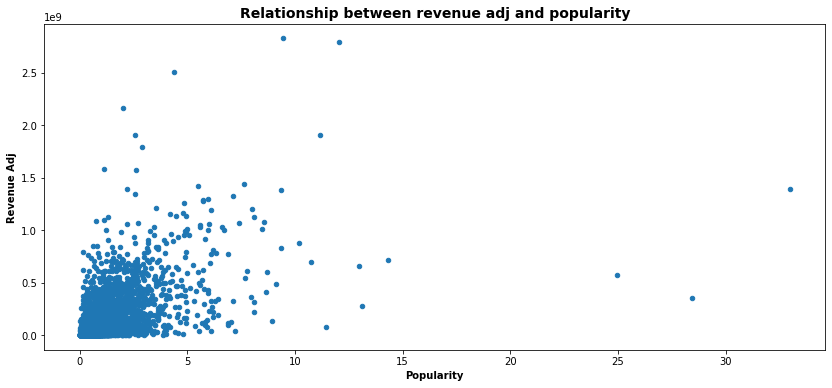

In [19]:
myscatterplot(df1_movies, 'popularity', 'revenue_adj')

>>The scatter plot above shows that there is a positive correlation between the popularity of a movie and the revenue generated from the movie which showed that the more popular a movie was the more likely that the movie was going to generate a higher revenue

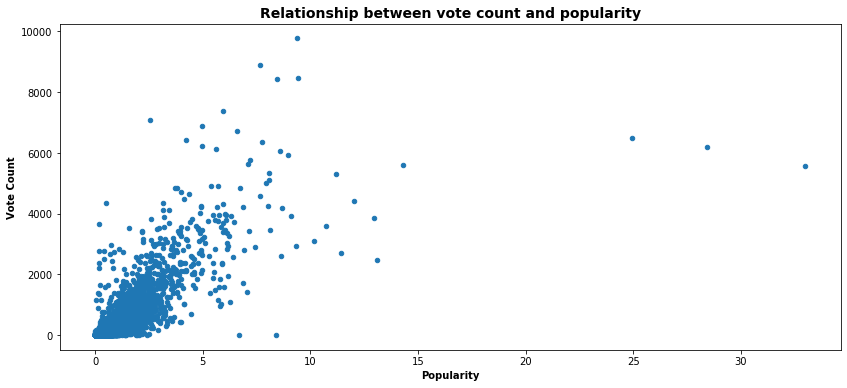

In [20]:

myscatterplot(df1_movies, 'popularity', 'vote_count')

>>The scatter plot above shows a positive correlation between popularity and number of votes which suggests that the more popular a movie was the higher the number of votes the movie had

### Research question 2: did the budget of the movie have any effect on any of the other variables

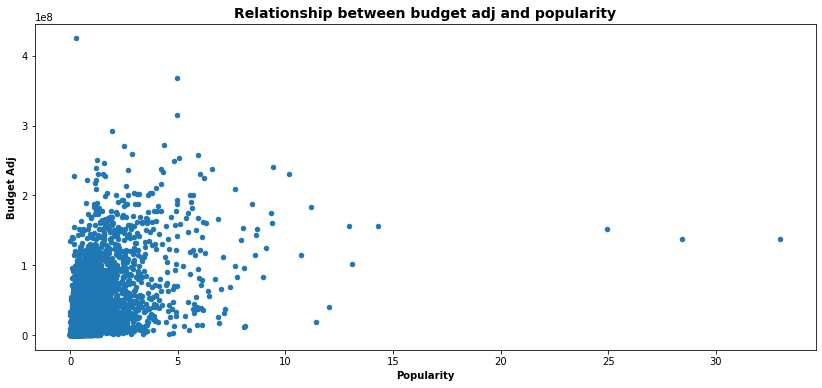

In [21]:

myscatterplot(df1_movies, 'popularity', 'budget_adj')

>> The scatter plot above shows a positive correlation between the amount spent on the movie and the popularity of the movie which suggests that the more money is spent on a movie the more likely the movie would get popular

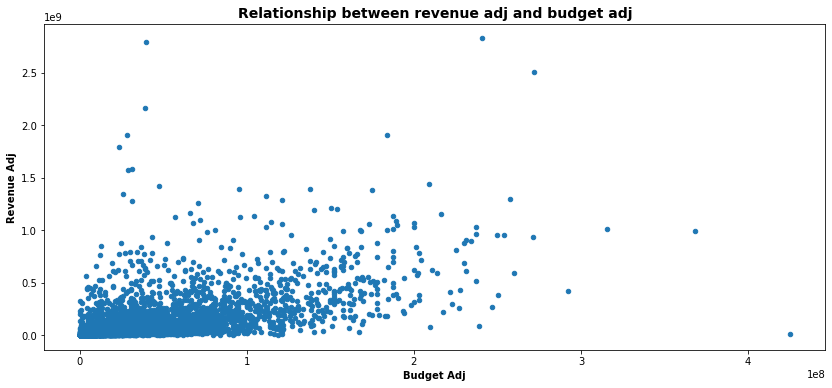

In [ ]:

myscatterplot(df1_movies, 'budget_adj', 'revenue_adj')

>>The scatter plot above shows the positive correlation between budget and revenue which suggests that the more  money in invested in the movie the more money would be generated from the movie

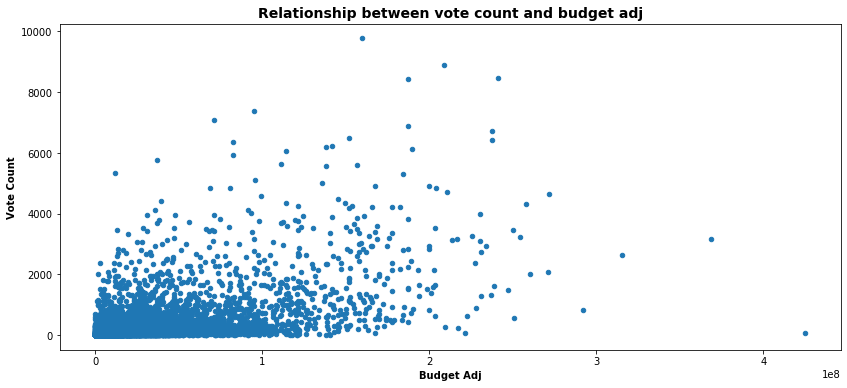

In [22]:

myscatterplot(df1_movies, 'budget_adj', 'vote_count')

>> The scatter plot above shows the positive correlation between the budget and  the amounts of votes

In [23]:

#A function the would reduce time for writing code for histogram would be created because I would be making use of a lot of scatter plots for my analysis
def myhistplot(df,xVar,bins= 30, figsize=[14,6]):
    df[xVar].hist(bins= bins,
                  grid= False,
                  edgecolor= 'black',
                  figsize= figsize);
    xVar = xVar.replace("_", " ")
  
    plt.title(f'Distribution of {xVar}', fontsize = 14, weight = "bold")

    plt.xlabel(xVar.title(), fontsize = 10, weight = "bold")

    plt.ylabel('Frequency', fontsize = 10, weight = "bold")

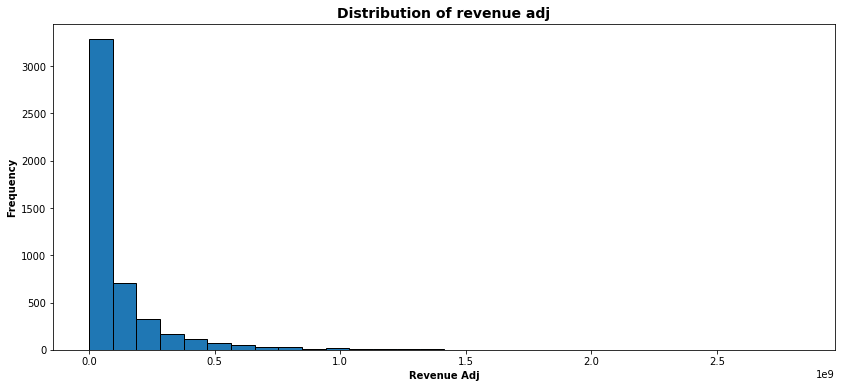

In [24]:
myhistplot(df1_movies,'revenue_adj')

>> The above graph shows that the distribution of the revenue adj is skewed right which shows that majority of the contain smaller values and very few contain larger values which shows that the distribution of the revenue adj is skewed right

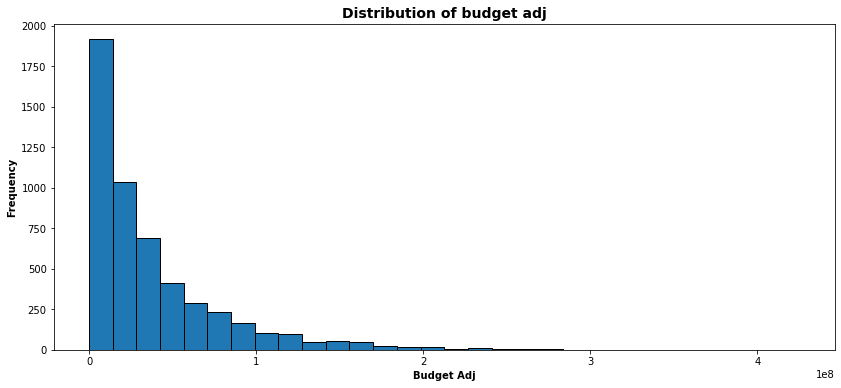

In [25]:
myhistplot(df1_movies, 'budget_adj')

>>The above graph shows that the distribution of the revenue adj is skewed right which shows that majority of the contain smaller values and very few contain larger values which shows that the distribution of the budget adj is skewed right

# Conclusion
- The analysis of the tmdb dataset shows the effect popularity and budget has on a movie. As seen in the scatter plots above  it is seen that the most popular movies generated more revenue the least popular movies, the scatter plots also shows the effect the budget of a movie has on the movie's popularity and the revenue generated by the movie where we have movies that had a very high budget had  higher revenue and more popularity compared to movies that had lower budgets.
- Additional information such as how much the cast earned, the season in which the movies were released, country of release etc would have further helped me to determine alot of things  in the analysis 

## Some of the limitations of the dataset includes
- insufficient number of columns with int which reduced the number of columns which could be related, very high number of unique values which limited my ability to group the dataset effectively, .